In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing Dataset
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load Dataset
# Function to load a CSV file into a pandas DataFrame
def load_csv(file_path):
    try:
        return pd.read_csv(file_path)  # Load the CSV file
    except Exception as e:
        print(f"Error: {e}")  # Print error message if loading fails
        return None  # Return None in case of failure

# Define file paths for the dfs
chicago_path = '/content/drive/MyDrive/Airbnb_Project/listings (Chicago).csv'  # File path for the 'chicago' df
new_orleans_path = '/content/drive/MyDrive/Airbnb_Project/listings (New Orleans).csv' # File path for 'new orleans' df
# Load the df using the load_csv function
chicago_df = load_csv(file_path=chicago_path)  # Load chicago df
new_orleans_df = load_csv(file_path=new_orleans_path)  # Load new orleans df
# Display all columns
pd.set_option('display.max_columns', None)


Mounted at /content/drive


In [ ]:
# Add the city column to each DataFrame
chicago_df['City'] = 'Chicago'
new_orleans_df['City'] = 'New Orleans'

In [ ]:
# Combine the two datasets
combined_df = pd.concat([chicago_df, new_orleans_df], ignore_index=True)

In [ ]:
# Saving the combined dataset
#combined_df.to_csv('/content/drive/MyDrive/Airbnb_Project/Combined_Listings.csv', index=False)

In [ ]:
# Create Copy of Combined df
df = combined_df.copy()

In [ ]:
# Number of Rows and Columns
print('Number of Rows =', df.shape[0])
print('Number of Columns =',df.shape[1])

Number of Rows = 16590
Number of Columns = 19


In [ ]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16590 entries, 0 to 16589
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16590 non-null  int64  
 1   name                            16590 non-null  object 
 2   host_id                         16590 non-null  int64  
 3   host_name                       16577 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   16590 non-null  object 
 6   latitude                        16590 non-null  float64
 7   longitude                       16590 non-null  float64
 8   room_type                       16590 non-null  object 
 9   price                           14358 non-null  float64
 10  minimum_nights                  16590 non-null  int64  
 11  number_of_reviews               16590 non-null  int64  
 12  last_review                     

In [ ]:
# Dataset Duplicate Value Count
print('Number of Duplicates in Dataset = ', df.duplicated().sum())

Number of Duplicates in Dataset =  0


In [ ]:
# Missing Values/Null Values Count
print('Number of Missing/Null Values in Dataset =', df.isnull().sum().sum())

Number of Missing/Null Values in Dataset = 28499


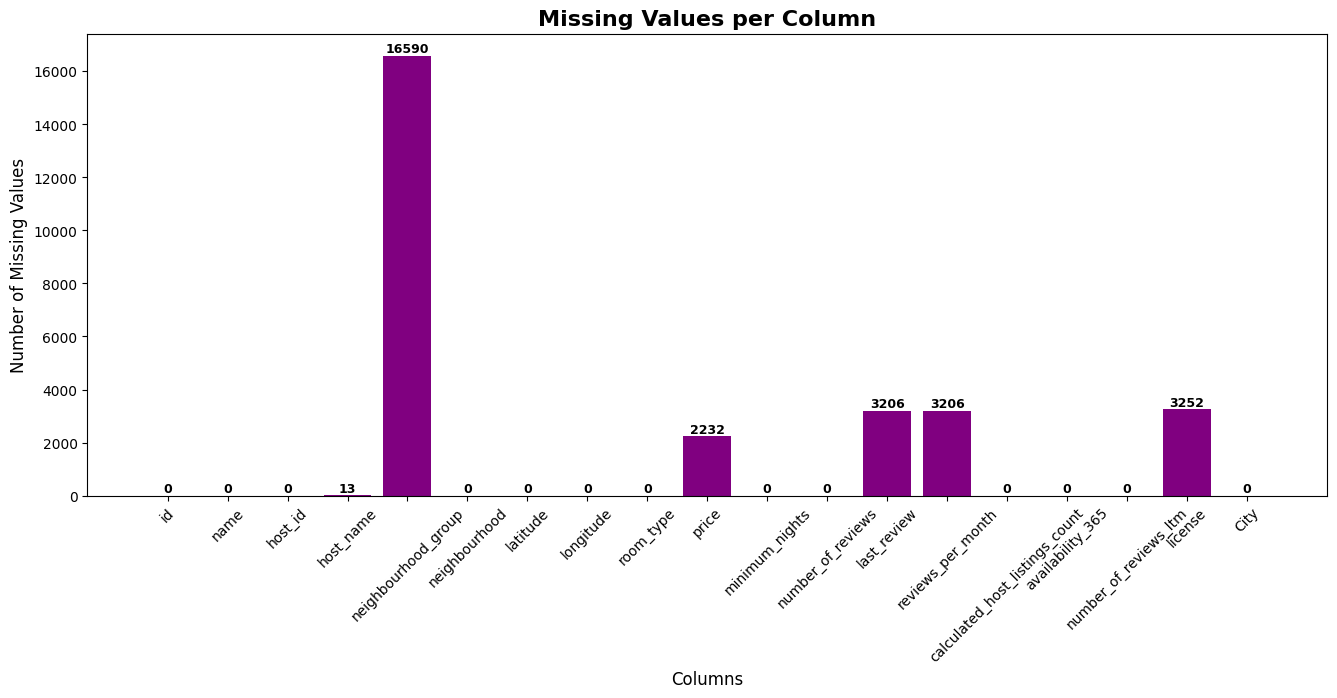

In [ ]:
# Visualizing the missing values
# Calculating the number of missing values per column
missing_values = df.isnull().sum()

# Filtering only columns with missing values
#missing_values = missing_values[missing_values > 0]

# Plotting the missing values
fig, ax = plt.subplots(figsize=(16, 6))
bars = ax.bar(missing_values.index, missing_values.values, color='purple')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}',
            ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

# Adding labels and title
plt.title('Missing Values per Column', fontsize=16, fontweight='bold')
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'City'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.659000e+04,1.659000e+04,0.0,16590.000000,16590.000000,14358.000000,16590.000000,16590.000000,13384.000000,16590.000000,16590.000000,16590.000000
mean,6.080594e+17,2.282752e+08,NaN,36.250631,-88.801328,289.780123,13.389451,58.349668,1.713416,34.189271,192.079385,13.292887
std,5.281997e+17,2.021071e+08,NaN,5.957724,1.204479,2379.940350,23.392198,97.189276,1.932129,110.859184,131.410632,19.735068
min,2.384000e+03,2.613000e+03,NaN,29.897042,-90.135521,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,4.013421e+07,4.598474e+07,NaN,29.960060,-90.072320,107.000000,1.000000,1.000000,0.490000,1.000000,67.000000,0.000000
50%,7.211123e+17,1.542455e+08,NaN,41.774399,-87.738392,172.000000,2.000000,19.000000,1.335000,4.000000,208.000000,5.000000
75%,1.109993e+18,4.310192e+08,NaN,41.896218,-87.655215,280.000000,30.000000,77.000000,2.460000,17.000000,320.000000,22.000000
max,1.374052e+18,6.824743e+08,NaN,42.022200,-87.528420,238121.000000,1125.000000,2241.000000,80.450000,597.000000,365.000000,642.000000


In [ ]:
# Check Unique Values for each variable.
print('\n Number of Unique Values in each column :\n')
print(df.nunique())


 Number of Unique Values in each column :

id                                16590
name                              15820
host_id                            7367
host_name                          3444
neighbourhood_group                   0
neighbourhood                       144
latitude                          12463
longitude                         12532
room_type                             4
price                              1126
minimum_nights                       59
number_of_reviews                   550
last_review                        1289
reviews_per_month                   739
calculated_host_listings_count       58
availability_365                    366
number_of_reviews_ltm               141
license                            8749
City                                  2
dtype: int64


In [ ]:
# Removing Unnecessary Columns
df.drop(columns = ['neighbourhood_group'], inplace = True)

In [ ]:
print('Null Values in Dataset\n')
print(df.isnull().sum())

Null Values in Dataset

id                                   0
name                                 0
host_id                              0
host_name                           13
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             2232
minimum_nights                       0
number_of_reviews                    0
last_review                       3206
reviews_per_month                 3206
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           3252
City                                 0
dtype: int64


In [ ]:
# Handling Null Values
# 1. Host_Name Column
df['host_name'].fillna('Unknown Host', inplace=True)

In [ ]:
# 2. Price Column
median_price = df['price'].median()
df['price'].fillna(median_price, inplace=True)

In [ ]:
# 3. License Column
df.drop(columns = ['license'], inplace = True)

In [ ]:
# 4. Last Review Column
df['last_review'].fillna('No Reviews', inplace=True)

In [ ]:
# 5. Reviews Per Month Column
df['reviews_per_month'].fillna(0, inplace=True)

In [ ]:
# Removing WhiteSpace and Capitalizing First Letter
# 1. Name Column
df['name'] = df['name'].str.strip().str.title()

In [ ]:
# 2. Host Name Column
df['host_name'] = df['host_name'].str.strip().str.title()

In [ ]:
# 3. Minimum Nights Column
# Cap minimum nights at 365
df['minimum_nights'] = df['minimum_nights'].clip(upper=365)

In [ ]:
# 4. Neighbourhood Name
# Standardize neighbourhood names
df['neighbourhood'] = df['neighbourhood'].str.strip().str.title()

In [ ]:
# View Cleaned Dataset
df.head(2)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,City
0,2384,Hyde Park - Walk To University Of Chicago,2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,125.0,3,250,2024-10-14,2.02,1,343,16,Chicago
1,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.90166,-87.68021,Entire home/apt,81.0,2,569,2025-02-09,2.98,1,275,53,Chicago
